## Task 1


$${Y \in {I \hspace{-0.3em}R}^n}, \;  \;\;\;{I \hspace{-0.3em}E}Y = \mu ,\;\;\;\;\; Cov(Y) = \Sigma,\;\;\;\; {A \in {I \hspace{-0.3em}R}^{n x n}} $$  

### js:
* $Y \in \mathbb R^n$ is not correct since $Y$ is a random variable, i.e., a measurable function with values in $\mathbb R^n$
$$ Y : (\Omega,\cal A, P) \to (\mathbb R^n, \cal B^n)$$

Show that: 

$${I \hspace{-0.3em}E}(Y^TAY) = \mu^tA\mu +  tr(A\Sigma)$$

From the Right hand side of the equation: 

$$\mu^tA\mu +  tr(A\Sigma)$$

$$= tr(A.\mu\mu^t) +  tr(A\Sigma)$$

$$= tr(A.\mu\mu^t +  A\Sigma)$$

$$= tr(A.(\mu\mu^t +  \Sigma))$$

$$= tr(A.(\mu\mu^t + {I \hspace{-0.3em}E}[(Y-\mu)(Y-\mu)^T]))$$
$$= tr(A.{I \hspace{-0.3em}E}[(YY^T])$$

$$= {I \hspace{-0.3em}E}[tr(AYY^T])$$


$$= {I \hspace{-0.3em}E}[tr(Y^TAY])$$

$$= {I \hspace{-0.3em}E}(Y^TAY)$$  
we obtain the left hand side of the original expression

### js:
* for me it not the natural choice to start from the right-hand side, but for an equality you can obviously start from either side
* 2/2

## Task 2

In [2]:
miete<-read.csv('mietspiegel99.csv',sep=',')

In [10]:
head(miete)

miete  mieteqm   flaeche bjahr bad kueche bezv lage zh
1  235.9  6.740000  35     1939  0   0      1112 1    0 
2  852.1  8.193269 104     1939  1   0      1112 1    1 
3  693.7 23.920690  29     1971  0   0      2114 2    1 
4  551.7 14.146150  39     1972  0   0      2148 2    1 
5 1574.1 16.227830  97     1985  0   0      2222 1    1 
6  941.5 15.185480  62     1962  0   0      2222 1    1

$\mathbb{E}(\text{mieteqm}_i)=\mu_i=\beta_0+\beta_1\frac{1}{\text{flaeche}_i}$

#### Maximum-Likelihood Estimation

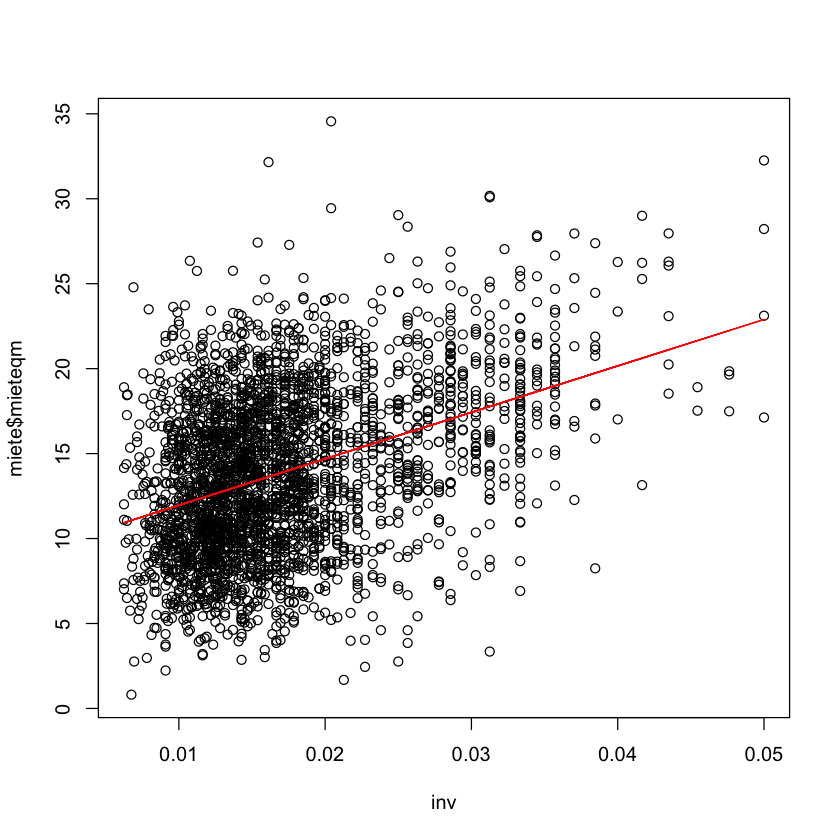

In [3]:
inv<-1/(miete$flaeche)
ml1<-lm(formula = mieteqm ~ 1+ I(1/flaeche) , data = miete)
pred1<-predict(ml1)
plot(x = inv,y = miete$mieteqm)
points(x = inv,y = pred1,col = 2,type = 'l')

#### Inclusion of 'lage' to the model

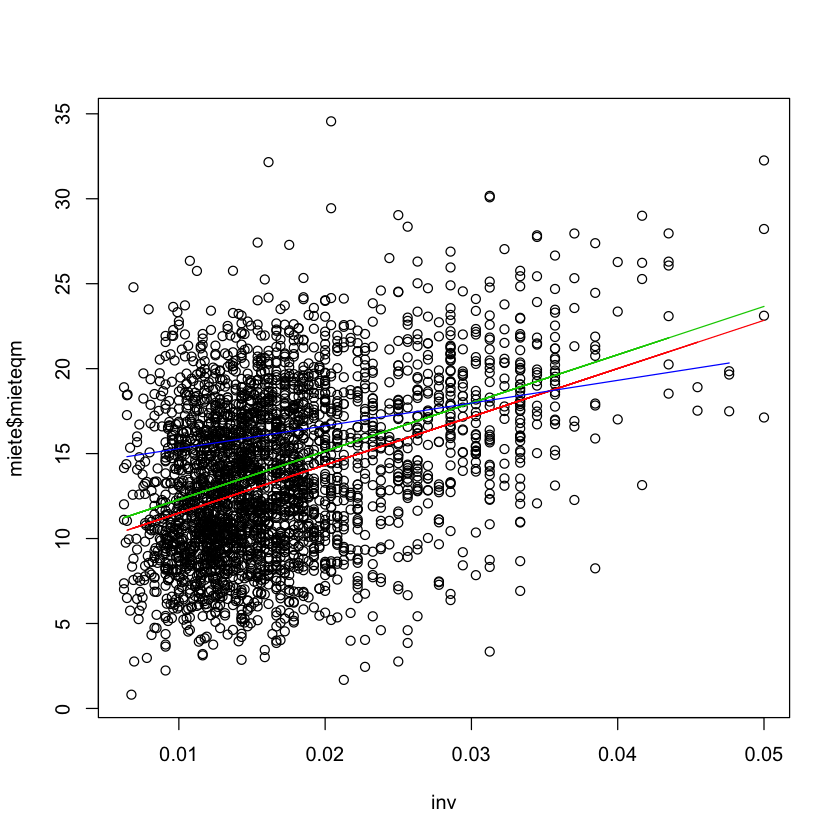

In [4]:
ml2<-lm(formula = mieteqm~1+I(1/flaeche)+as.factor(lage)+I(1/flaeche):as.factor(lage),data = miete)
pred2<-predict(ml2)

plot(x = inv,y = miete$mieteqm)
points(x = inv[which(miete$lage==1)],y = pred2[which(miete$lage==1)],col = 2,type = 'l')
points(x = inv[which(miete$lage==2)],y = pred2[which(miete$lage==2)],col = 3,type = 'l')
points(x = inv[which(miete$lage==3)],y = pred2[which(miete$lage==3)],col = 4,type = 'l')

### Relation between Construction year (Baujahr)  and Squared meter price (Quadratmeterpreis)

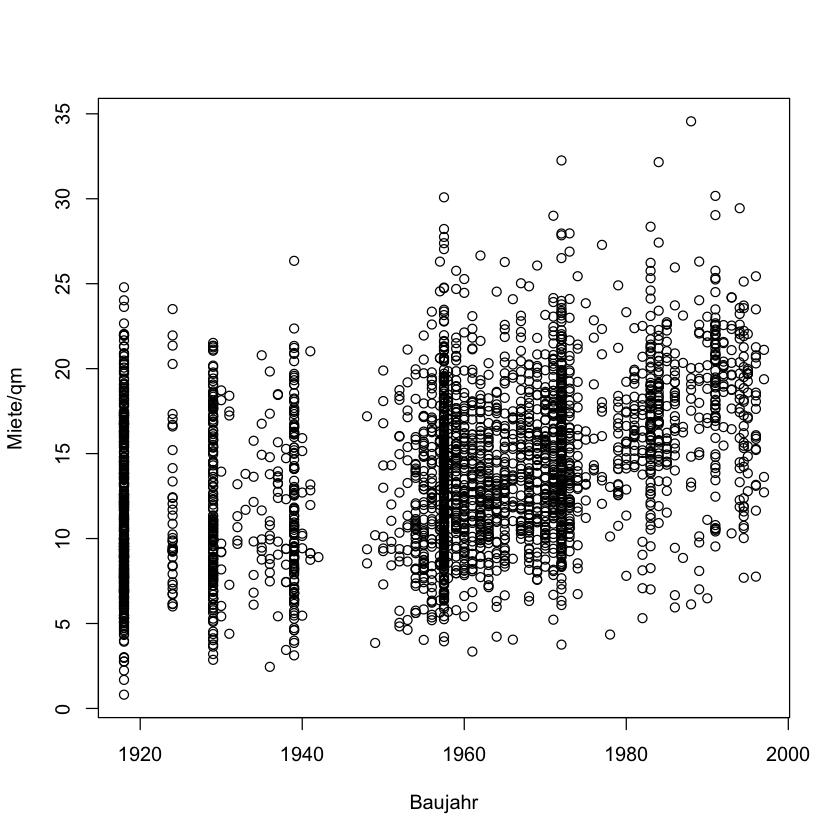

In [11]:
plot(x = miete$bjahr,y = miete$mieteqm,xlab = 'Baujahr',ylab = 'Miete/qm')

**Not clear.**

**Second attempt: Using the average value of the range for each construction year**

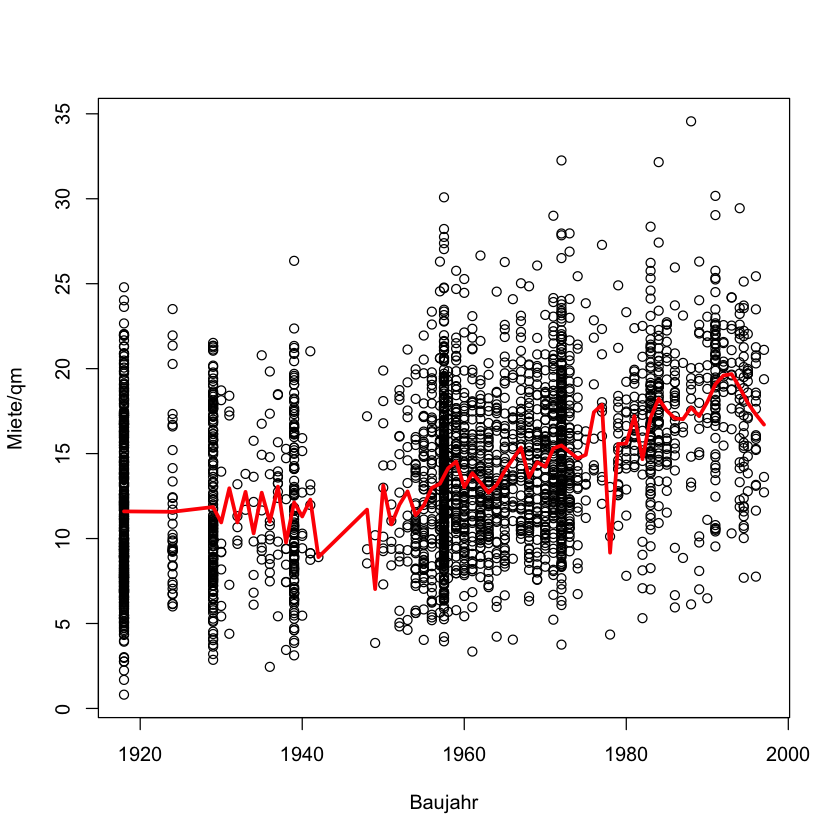

In [12]:
plot(x = miete$bjahr,y = miete$mieteqm,xlab = 'Baujahr',ylab = 'Miete/qm')

avg_miete<-function(year){
  mean(miete$mieteqm[which(miete$bjahr==year)])
}
avg_miete.vec<-Vectorize(avg_miete,'year')

years<-seq(min(miete$bjahr),max(miete$bjahr),1)
avg<-avg_miete.vec(years)

points(x = years[which(avg!=0)], y = avg[which(avg!=0)],type='l',col = 2, lwd=3)

### js: 
* the core idea of parametric regression modelling is to find simple parametric descriptions of functional relationships
* averaging within individual years produces an erratic discription with the additional problem of great uncertainty in years with just a few observations in the data set
* My proposed model would look like 
$$ \texttt{lm(mieteqm~1+bjahr+I(bjahr^2), data=miete.data)}$$
* but of course there are many other ways (like, e.g., moving averages over several years)

**Still not a clear relationship**

**Third attempt: Using the average of 7 construction years with the most apartments**


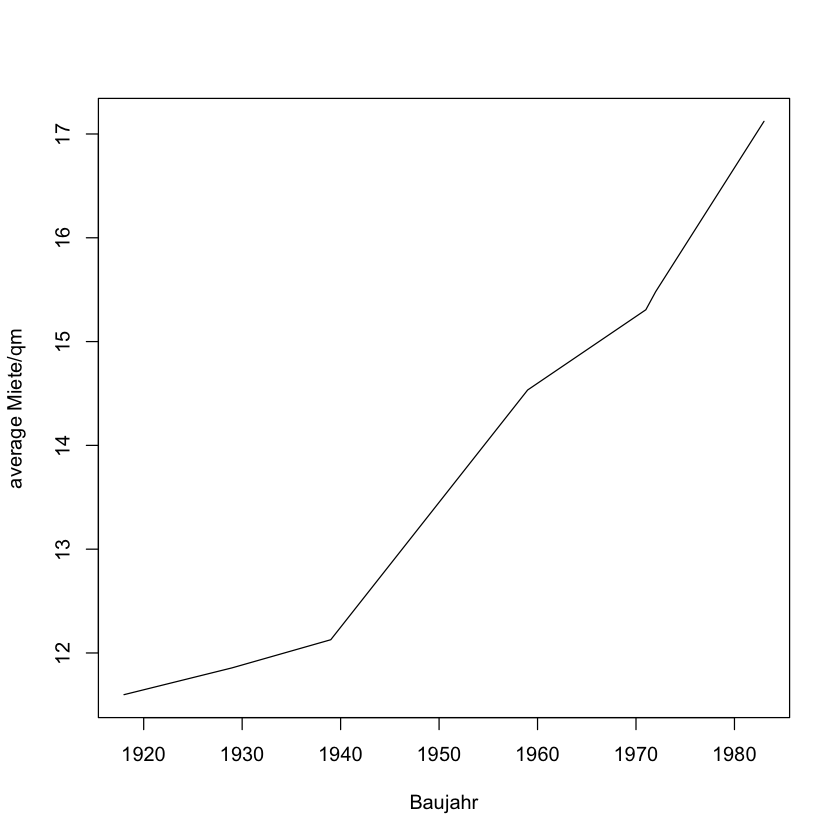

In [26]:
top_n_years<-function(n){
  y<-years[which(avg!=0)]
  tmp<-rep(0,length(y))
  for (i in 1:length(y)){
    year<-y[i]
    tmp[i]<-sum(miete$bjahr==year)
  }
  sort(y[order(tmp,decreasing = T)][1:n],decreasing = F)
}


plot(top_n_years(7),avg_miete.vec(top_n_years(7)),type = 'l',xlab = 'Baujahr',ylab = 'average Miete/qm')

### js:
* Using only 7 years ignores a lot of information, doesn't it?
* you can easily imagine that you have a data set where the most abundant years are the most recent ones
* in that case your selected subset does not at all represent the whole data set

7 years was taken after various trials, to obtain an explanable relationship

**This relationship looks quadratic**

### Adding the Construction year to the model

In [36]:
ml3<-lm(formula = mieteqm~1+I(1/flaeche)+as.factor(lage)+I(1/flaeche):as.factor(lage)+I(bjahr^2),data = miete)
pred3<-predict(ml3)
pred3

### js:
* we discussed the problem of forcing the minimum to bjahr=0 during our Tuesday session
* you MUST incorporate ...+bjahr+...

**Because three factors are taken into account in this model with area, location and construction year, a 2D plot is no longer good enough**

### js: 
* yes, visualising more-dimensional data can be challenging
* but sometimes color help or creating subgroups and averaging within subgroups
* but graphical presentation is not our focus here

### Adding the Bathroom, Kitchen and Central_heating to the model

In [35]:
ml4<-lm(formula = mieteqm~1+I(1/flaeche)+as.factor(lage)+I(1/flaeche):as.factor(lage)+bjahr^2+as.factor(bad)+as.factor(kueche)+as.factor(zh),data = miete)
pred4<-predict(ml4)
pred4

## Prediction for a given appartment

In [45]:
year<-1950
area<-100
l<-3
heat<-1
kitchen<-0
bath<-1
ndata<-data.frame(bjahr=year,lage=l,bad=bath,kueche=kitchen,flaeche=area,zh=heat)
ndata

bjahr lage bad kueche flaeche zh
1 1950  3    1   0      100     1

### The following plot illustrates how the inclusion of various factors into the model affects the amount of the expected rent.

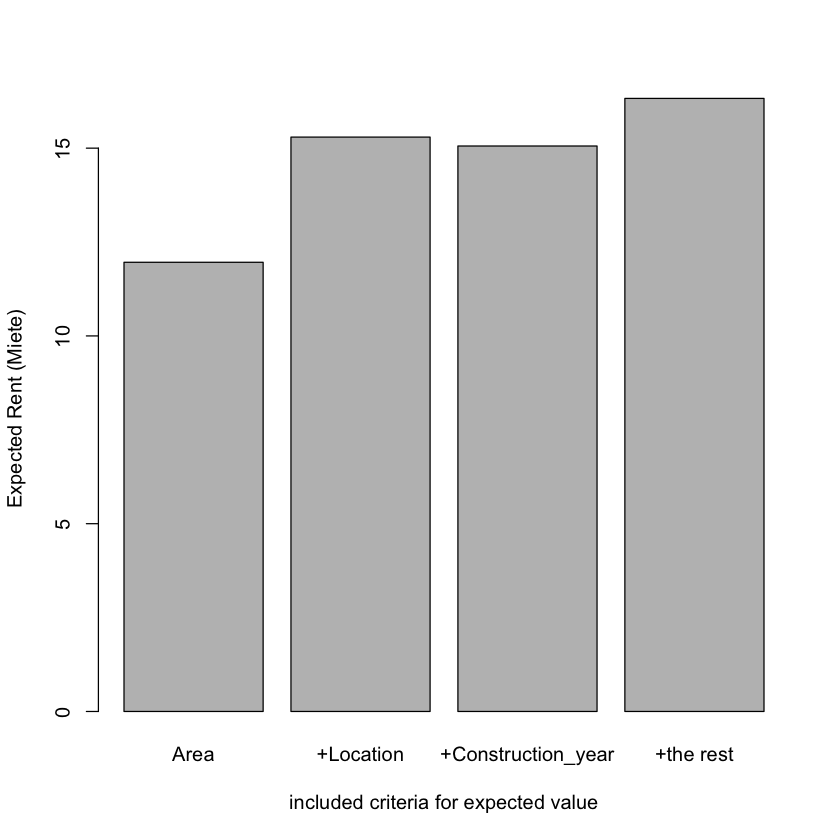

In [47]:
y<-c(predict(ml1,newdata = ndata),predict(ml2,newdata = ndata),predict(ml3,newdata = ndata),predict(ml4,newdata = ndata))
x<-c('Area','+Location','+Construction_year','+the rest')

barplot(height = y,names.arg = x,xlab = 'included criteria for expected value',ylab = 'Expected Rent (Miete)')

### js:
7/8